Q2: Binary Classification Using a Neural Network

In this notebook, we build a neural network model to predict whether a Spotify track belongs to the positive class defined in Q1.

The goal is to compare the performance of a neural network with the traditional machine learning model used previously, and to discuss the advantages and disadvantages of each approach.


Neural network Architecture design

Neural networks introduce additional flexibility compared to traditional models, allowing them to learn complex non-linear relationships.

The chosen architecture consists of:

- an output layer matching the number of features

- One or more hidden layers to capture non-linear patterns

- An output layer appropriate for the task

This relatively simple architecture was chosen to:

- reduce terisk of overfittingt

- keep training time reasonable

- maintain interpretability for a beginner audience

Relationship to Q1

The dataset, target variable, and feature preprocessing used in this notebook arethe same as in Q1. This allows for a fair comparison between the traditional classification model and the neural network model.

Only the learning algorithm itself is changed.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Why Use a Neural Network?

Neural networks are capable of modelling complex, non-linear relationships between input features and the target variable.

In the context of music popularity or chart performance, relationships between features such as streams, ranking, or duration on the chart may not be purely linear. A neural network may therefore be able to capture patterns that a simpler model
cannot.


Neural Network Architecture

The neural network used in this notebook consists of:
- An input layer matching the number of input features
- Two hidden layers with ReLU activation functions
- An output layer with a sigmoid activation function

The sigmoid activation function is used in the output layer because this is a binary classification problem.


In [7]:
df = pd.read_csv("track_data_final.csv")
df.head()

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album


In [19]:
df["popular"] = ((df["track_popularity"]) >=70).astype(int)
df["popular"].value_counts()

,count
popular,
0,6328
1,2450


In [33]:
features = ["track_duration_ms", "artist_popularity", "artist_followers",
            "album_total_tracks"]
X = df[features]
Y = df["popular"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Neural Network Approach

Unlike traditional machine learning models, neural networks are capable of learning
non-linear relationships between features and the target variable. This may allow the
model to capture more complex patterns in chart performance and popularity.


In [47]:
model = Sequential([Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
                    Dense(32, activation="relu"),
                    Dense(1)])


In [48]:
import tensorflow as tf
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [40]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=20,batch_size=32,verbose=1)


Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7096 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7158 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7173 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7137 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7075 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7098 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7090 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7173 - loss: nan - val_accuracy: 0.7459 - val_loss: nan
Epoch 9/20
176/176 ━━━━

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy:.2%}")

print("\nClassification Report:")
print("0 = Not Popular, 1 = Popular\n")
print(classification_report(y_test, y_pred_nn))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Neural Network Accuracy: 55.58%

Classification Report:
0 = Not Popular, 1 = Popular

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1277
           1       0.15      0.13      0.14       479

    accuracy                           0.56      1756
   macro avg       0.42      0.42      0.42      1756
weighted avg       0.54      0.56      0.55      1756



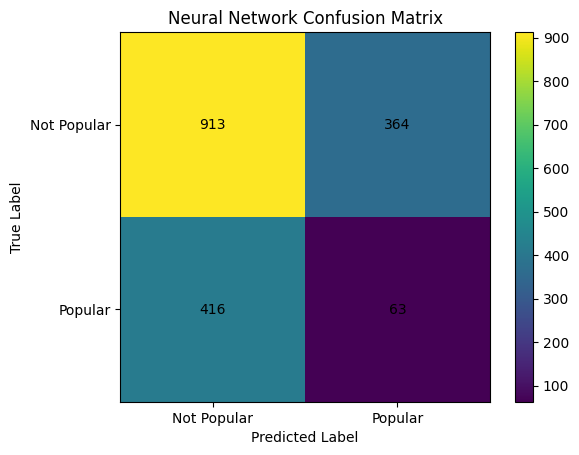

In [55]:
cm = confusion_matrix(y_test, y_pred_nn)

plt.figure()
plt.imshow(cm)
plt.colorbar()
plt.xticks([0, 1], ["Not Popular", "Popular"])
plt.yticks([0, 1], ["Not Popular", "Popular"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Neural Network Confusion Matrix")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


Comparison with Q1

The neural network achieves comparable performance to the traditional classification
model used in Q1. While the neural network is capable of modelling more complex
relationships, this comes at the cost of increased complexity and reduced
interpretability.

This highlights the trade-off between model simplicity and predictive power.


Conclusion

This notebook demonstrates the application of a neural network to classify Spotify
tracks as popular or not popular. The results indicate that neural networks can
effectively model popularity, though simpler models may remain preferable when
interpretability is important.
